# Titanic survived Project

## Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 

Attribute Information: 

Passenger id- Unique Id of the passenger

Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Survived- Survived (0 = No; 1 = Yes)

Name- Name of the passenger

Sex- Sex of the passenger (Male, Female)

Age- Age of the passenger

Sibsp- Number of Siblings/Spouses Aboard

Parch- Number of Parents/Children Aboard

Ticket- Ticket Number

Fare- Passenger Fare (British pound)

Cabin- Cabin

Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


### Objective: Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

### Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Titanic/titanic_train.csv



In [2]:
# Importing dependencies
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
os.chdir("F:\\FlipRobo\\Projects\\Titanic survived project")


In [3]:
df=pd.read_csv('titanic_train.csv', na_values=["?"])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

## Exploratory data analysis

### Checking for variable types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Observation: "Name","Ticket" and "PassengerId" can be dropped from the dataframe as they are not supposed to affect the survivability.

In [6]:
df1=df.drop(["Name","PassengerId","Ticket"],axis=1,inplace=False )
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


### Checking for missing values

In [7]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### Observation: There are 177 missing values in "Age", 687 missing values in "Cabin" and only 2 missing values in "Embarked".

#### Next we should:

(1) As there are a large number of missing values in "Cabin". Therefore, it is better to drop it.

(2) As there are only 177 missing values in "Age" and 2 missing values in "Embarked". Therefore, it is better to impute these.

#### Dropping "Cabin"

In [8]:
df1.drop(['Cabin'], axis=1,inplace=True)

In [9]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
df1.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

#### Observation: Only "Fare" and "Age" are continuous features. Rest all the features are discrete.

Next:

 "Age" being a continuous variable, so the missing values in it can be replaced by mean, where as that of "Embarked", which is a discrete varaible can be replaced by mode.

In [12]:
df1["Embarked"].fillna(df1["Embarked"].mode()[0], inplace=True)

df1["Age"].fillna(df1["Age"].mean(), inplace=True)


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


#### Observation: Now there are no features in the dataframe with missing values.

Next:

There are two categorical features "Sex" and "Embarked". Therefore, these need to be converted to numerical variables.

### Categorical to numerical conversion: using one hot encoding

In [14]:
df1=pd.get_dummies(df1, columns=['Sex','Embarked'])
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


## Visualization

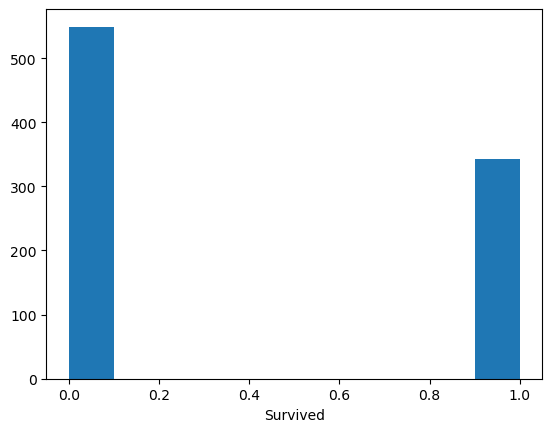

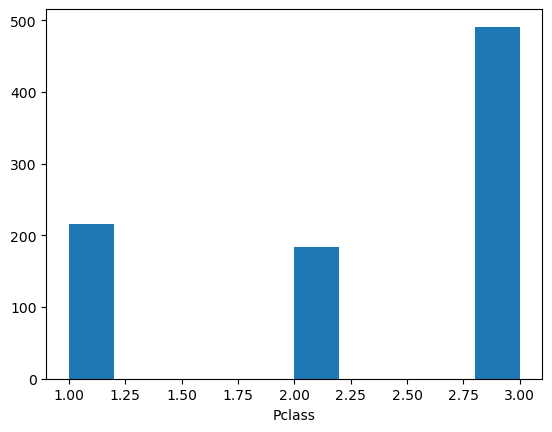

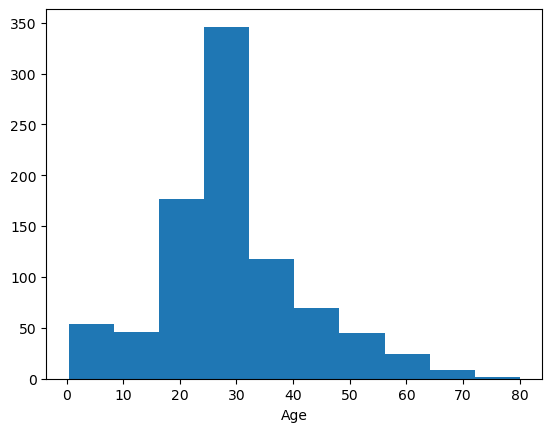

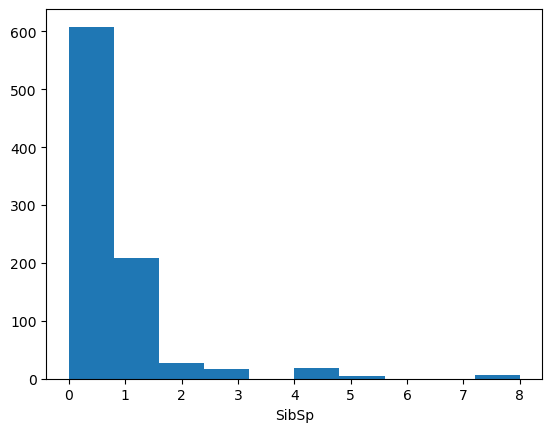

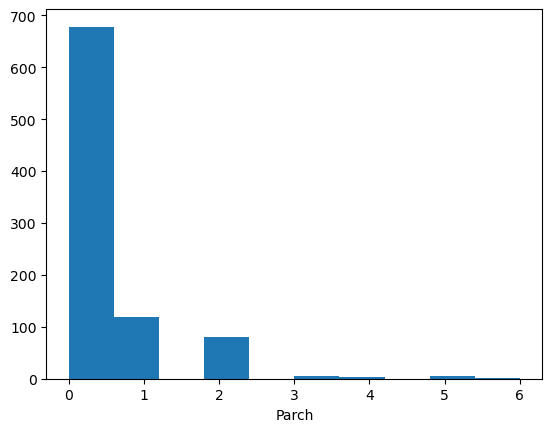

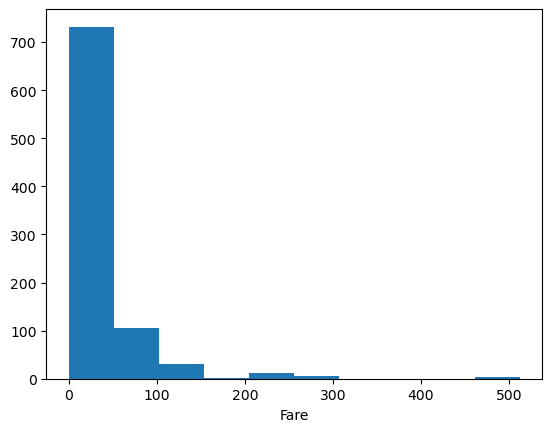

In [16]:
for col in df1.select_dtypes(include=['float','int']).columns:
    plt.hist(df1[col])
    plt.xlabel(col)
    plt.show()


### To check for the skewness of continuous variables: "Fare" and "Age"

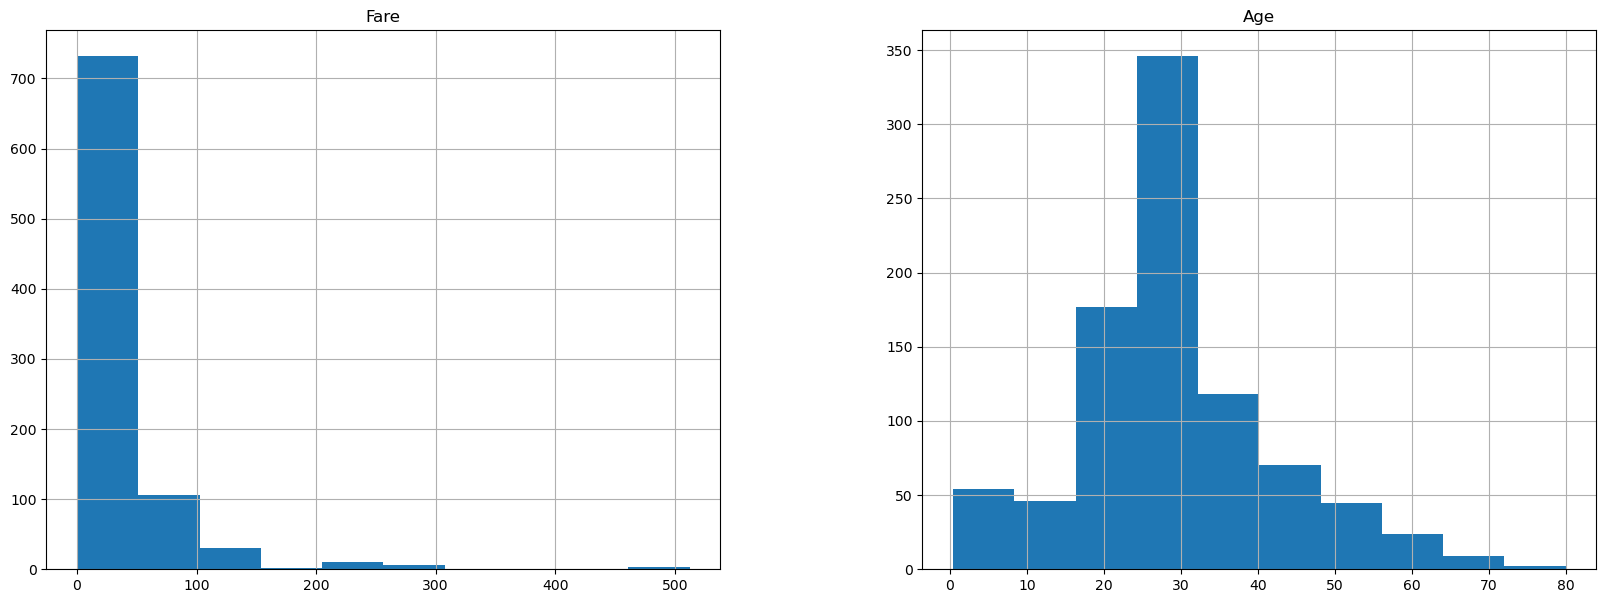

In [17]:
df1[["Fare","Age"]].hist(figsize=(20,7))
plt.show()

In [18]:
df1[["Fare","Age"]].skew()

Fare    4.787317
Age     0.434488
dtype: float64

#### Observation: "Fare" is highly skewed. 
Next:
Transforming the feature "Fare" using Box-Cox transformation.

### Reducing skewness: Using Box-Cox transformation of the continuous variables

Skewness of Fare: Fare   -0.040329
dtype: float64


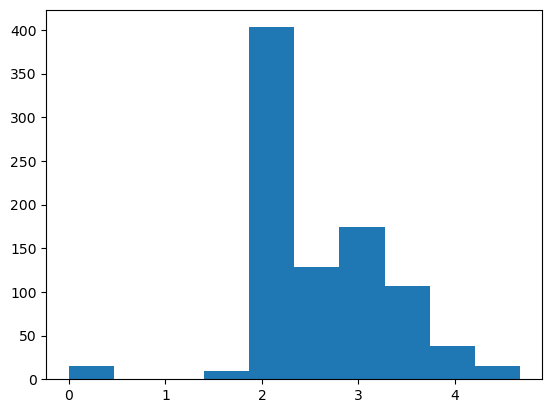

In [19]:
from scipy.stats import boxcox
df2=pd.DataFrame()
coll,lambda_value=boxcox(df1['Fare']+1)

df2 = pd.DataFrame({'Fare': coll})
skewness = pd.Series(df2.skew())
print(f"Skewness of Fare:", skewness)
plt.hist(coll)
plt.show()

In [20]:
df3=pd.concat([df1.drop(["Fare"],axis=1),df2], axis=1)
df3.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare
0,0,3,22.0,1,0,0,1,0,0,1,1.906724
1,1,1,38.0,1,0,1,0,1,0,0,3.497640
2,1,3,26.0,0,0,1,0,0,0,1,1.970459
3,1,1,35.0,1,0,1,0,0,0,1,3.304258
4,0,3,35.0,0,0,0,1,0,0,1,1.981680


In [21]:
df3[["Fare","Age"]].skew()

Fare   -0.040329
Age     0.434488
dtype: float64

### Multicollinearity: To identify correlations(linearly or non-linearly) between variable pairs

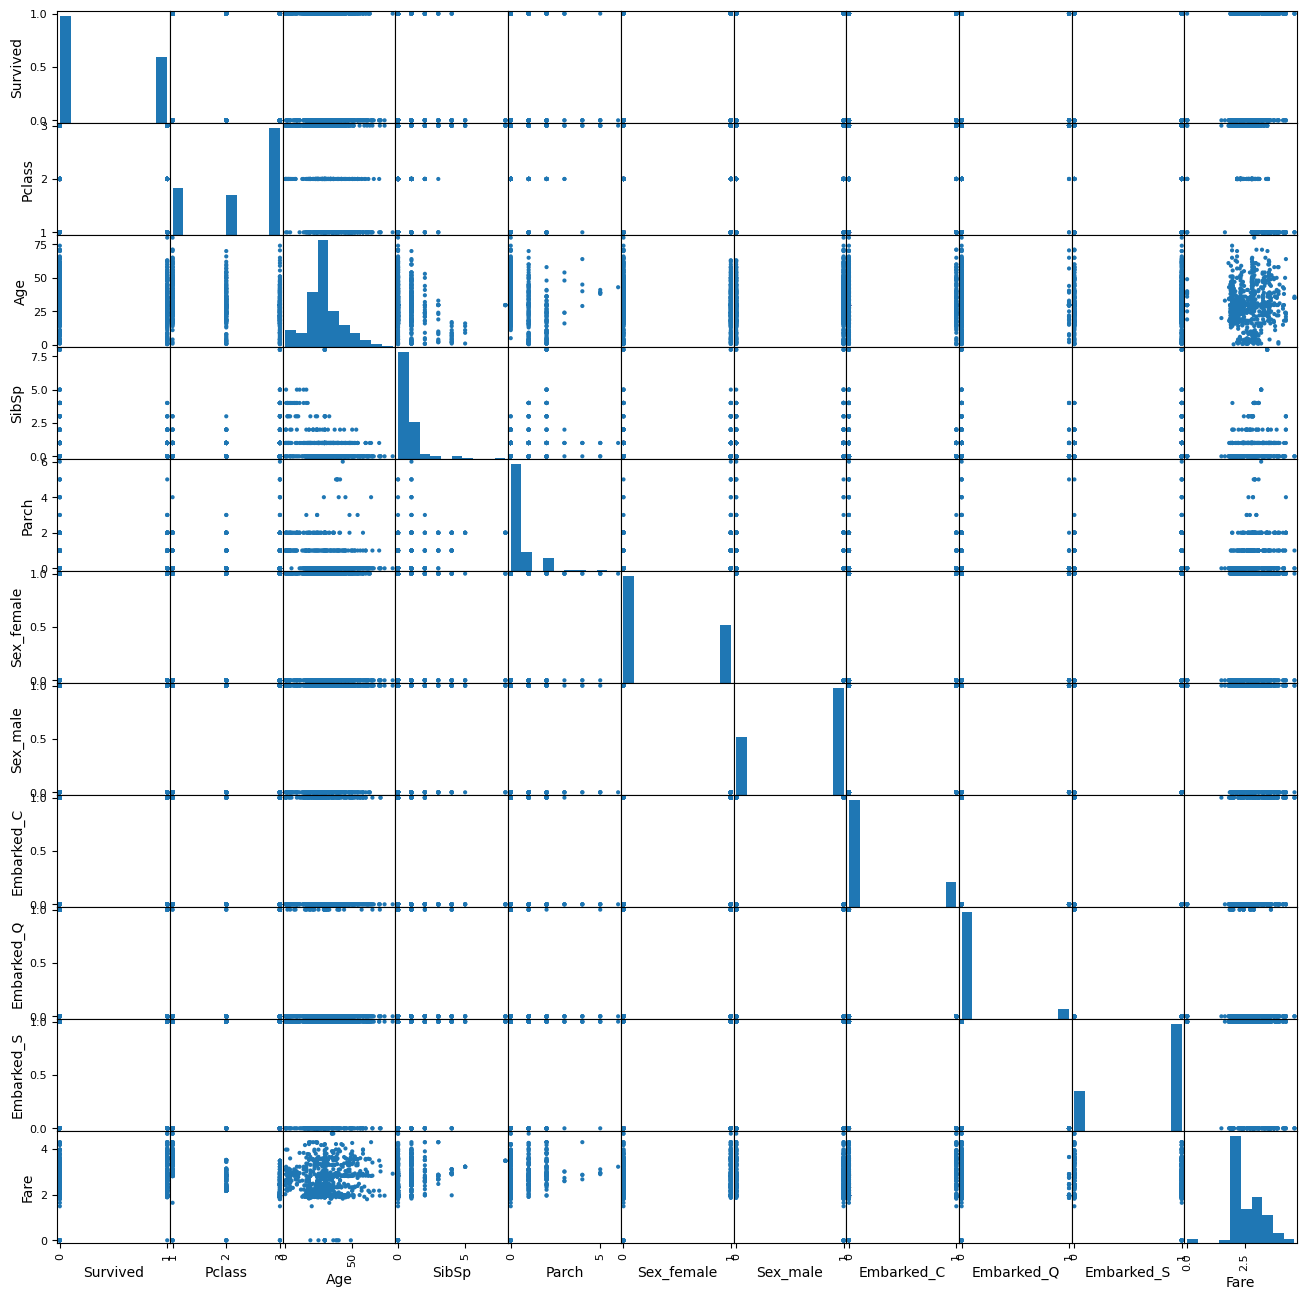

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(df3, alpha=1, figsize=(16,16))
plt.show()

#### Segregating the features(X) and label(y)

In [23]:
X=df3.drop('Survived', axis=1)
y=df3['Survived']

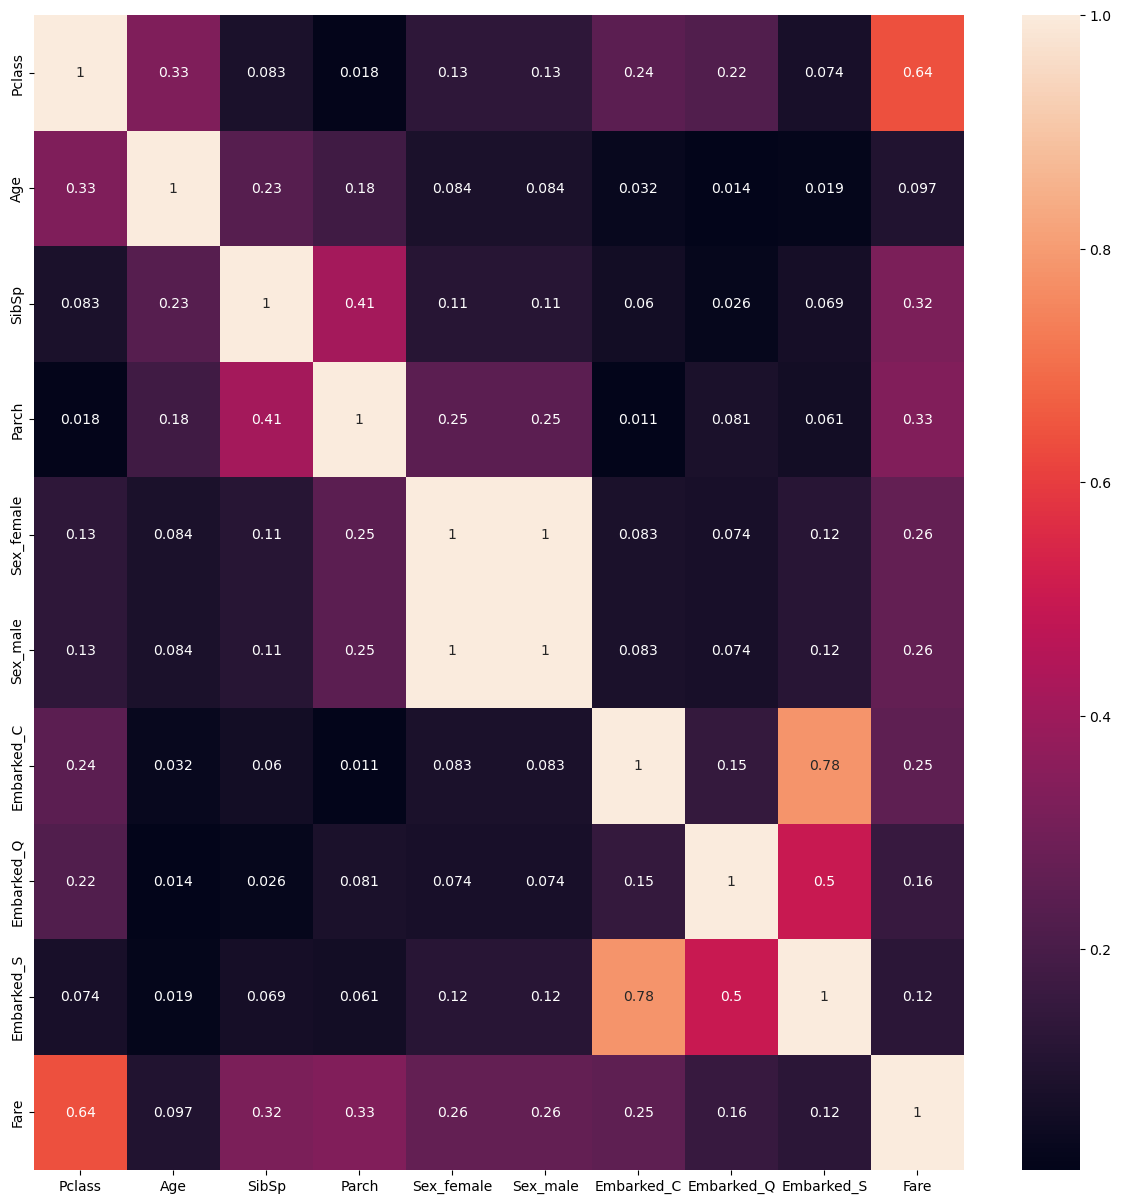

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(abs(X.corr()), annot=True)
plt.show()

#### Observation: There is no significan tcorrelations between variable pairs.

### Checking for imbalance in classes

In [25]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Observation: There are 342 people who survived and 549 did not survive. So one class which is those who survived is a minority class. However, this imbalance can be ignored, beacuse there is not a very large difference between the two classes.

### To check for scale of features

In [26]:
X.describe(include='all')

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,0.352413,0.647587,0.188552,0.086420,0.725028,2.537799
std,0.836071,13.002015,1.102743,0.806057,0.477990,0.477990,0.391372,0.281141,0.446751,0.718497
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.969136
50%,3.000000,29.699118,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.402006
75%,3.000000,35.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.939543
max,3.000000,80.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.671393


#### Observation: All the variables are in single digit, whereas "Age" is in double digit also.

Next: So it is necessary to scale the feature matrix using standard scaler inorder to nullify extra weightage of "Age"compared to other variables.

### Scaling the features

In [27]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X1=scale.fit_transform(X)
X2=pd.DataFrame(X1, columns=X.columns)
X2

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare
0,0.827377,-0.592481,0.432793,-0.473674,-0.737695,0.737695,-0.482043,-0.307562,0.615838,-0.878820
1,-1.566107,0.638789,0.432793,-0.473674,1.355574,-1.355574,2.074505,-0.307562,-1.623803,1.336651
2,0.827377,-0.284663,-0.474545,-0.473674,1.355574,-1.355574,-0.482043,-0.307562,0.615838,-0.790065
3,-1.566107,0.407926,0.432793,-0.473674,1.355574,-1.355574,-0.482043,-0.307562,0.615838,1.067352
4,0.827377,0.407926,-0.474545,-0.473674,-0.737695,0.737695,-0.482043,-0.307562,0.615838,-0.774439
...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.207709,-0.474545,-0.473674,-0.737695,0.737695,-0.482043,-0.307562,0.615838,-0.294907
887,-1.566107,-0.823344,-0.474545,-0.473674,1.355574,-1.355574,-0.482043,-0.307562,0.615838,0.527906
888,0.827377,0.000000,0.432793,2.008933,1.355574,-1.355574,-0.482043,-0.307562,0.615838,0.288885
889,-1.566107,-0.284663,-0.474545,-0.473674,-0.737695,0.737695,2.074505,-0.307562,-1.623803,0.527906


In [28]:
X2.describe()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-2.031048e-16,2.562796e-16,3.456519e-16,6.716164e-17,3.162453e-16,-4.059603e-16,1.167541e-16,-4.017238e-16,-2.093350e-16,1.885261e-16
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.566107e+00,-2.253155e+00,-4.745452e-01,-4.736736e-01,-7.376951e-01,-1.355574e+00,-4.820427e-01,-3.075623e-01,-1.623803e+00,-3.534079e+00
25%,-3.693648e-01,-5.924806e-01,-4.745452e-01,-4.736736e-01,-7.376951e-01,-1.355574e+00,-4.820427e-01,-3.075623e-01,-1.623803e+00,-7.919073e-01
50%,8.273772e-01,0.000000e+00,-4.745452e-01,-4.736736e-01,-7.376951e-01,7.376951e-01,-4.820427e-01,-3.075623e-01,6.158384e-01,-1.891020e-01
75%,8.273772e-01,4.079260e-01,4.327934e-01,-4.736736e-01,1.355574e+00,7.376951e-01,-4.820427e-01,-3.075623e-01,6.158384e-01,5.594584e-01
max,8.273772e-01,3.870872e+00,6.784163e+00,6.974147e+00,1.355574e+00,7.376951e-01,2.074505e+00,3.251373e+00,6.158384e-01,2.971192e+00


#### Observation: All the features are now scaled with mean = 0. Also the values are with in similar range.

## Model building

In [30]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,make_scorer
from sklearn.model_selection import cross_val_score,GridSearchCV


### Splitting the feature(X) and label(y) as training and test data sets

In [31]:
from sklearn.model_selection import train_test_split

#### To find the best random state

In [32]:

from sklearn.metrics import accuracy_score
MaxAcc=0
rs=0
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.3,random_state=i)
    LR=LogisticRegression()
    model=LR.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_pred,y_test)
    if acc>MaxAcc:
        MaxAcc=acc
        rs=i
print("Best accuracy score:",MaxAcc)
print("Random state:",rs)

Best accuracy score: 0.8582089552238806
Random state: 585


#### Observation: Random state = 585 gives the best accuracy in a range upto 1000 states.

Next: using random state = 585 in all the modeling algorithms

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.3,random_state=585)

### Logistic Regression

In [34]:
LR=LogisticRegression()
model=LR.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_pred,y_test)
conf_matrix=confusion_matrix(y_pred,y_test)
report=classification_report(y_pred,y_test)
cv_score=cross_val_score(LR,X_train,y_train,cv=10).mean()
print("Accuracy score:{:.2f}".format(acc))
print("Cross validation score:{:.2f}".format(cv_score))
print("Classification report:\n",report)
print("Confusion matrix:\n",conf_matrix)

Accuracy score:0.86
Cross validation score:0.76
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       164
           1       0.81      0.83      0.82       104

    accuracy                           0.86       268
   macro avg       0.85      0.85      0.85       268
weighted avg       0.86      0.86      0.86       268

Confusion matrix:
 [[144  20]
 [ 18  86]]


### Ridge Classifier

In [35]:
RC=RidgeClassifier()
model=RC.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_pred,y_test)
conf_matrix=confusion_matrix(y_pred,y_test)
report=classification_report(y_pred,y_test)
cv_score=cross_val_score(RC,X_train,y_train,cv=10).mean()
print("Accuracy score:{:.2f}".format(acc))
print("Cross validation score:{:.2f}".format(cv_score))
print("Classification report:\n",report)
print("Confusion matrix:\n",conf_matrix)

Accuracy score:0.84
Cross validation score:0.77
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       164
           1       0.78      0.80      0.79       104

    accuracy                           0.84       268
   macro avg       0.83      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268

Confusion matrix:
 [[141  23]
 [ 21  83]]


### Decision Tree Classifier

In [36]:
DT=DecisionTreeClassifier()
model=DT.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_pred,y_test)
conf_matrix=confusion_matrix(y_pred,y_test)
report=classification_report(y_pred,y_test)
cv_score=cross_val_score(DT,X_train,y_train,cv=10).mean()
print("Accuracy score:{:.2f}".format(acc))
print("Cross validation score:{:.2f}".format(cv_score))
print("Classification report:\n",report)
print("Confusion matrix:\n",conf_matrix)

Accuracy score:0.75
Cross validation score:0.75
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       165
           1       0.67      0.69      0.68       103

    accuracy                           0.75       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268

Confusion matrix:
 [[130  35]
 [ 32  71]]


### Random Forest Classifier

In [37]:
RF=RandomForestClassifier()
model=RF.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_pred,y_test)
conf_matrix=confusion_matrix(y_pred,y_test)
report=classification_report(y_pred,y_test)
cv_score=cross_val_score(RF,X_train,y_train,cv=10).mean()
print("Accuracy score:{:.2f}".format(acc))
print("Cross validation score:{:.2f}".format(cv_score))
print("Classification report:\n",report)
print("Confusion matrix:\n",conf_matrix)

Accuracy score:0.84
Cross validation score:0.79
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       167
           1       0.77      0.81      0.79       101

    accuracy                           0.84       268
   macro avg       0.83      0.83      0.83       268
weighted avg       0.84      0.84      0.84       268

Confusion matrix:
 [[143  24]
 [ 19  82]]


### AdaBoost Classifier

In [38]:
AC=AdaBoostClassifier()
model=AC.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_pred,y_test)
conf_matrix=confusion_matrix(y_pred,y_test)
report=classification_report(y_pred,y_test)
cv_score=cross_val_score(AC,X_train,y_train,cv=10).mean()
print("Accuracy score:{:.2f}".format(acc))
print("Cross validation score:{:.2f}".format(cv_score))
print("Classification report:\n",report)
print("Confusion matrix:\n",conf_matrix)

Accuracy score:0.82
Cross validation score:0.78
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       161
           1       0.77      0.77      0.77       107

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

Confusion matrix:
 [[137  24]
 [ 25  82]]


### Bagging Classifier

In [39]:
BC=BaggingClassifier()
model=BC.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_pred,y_test)
conf_matrix=confusion_matrix(y_pred,y_test)
report=classification_report(y_pred,y_test)
cv_score=cross_val_score(BC,X_train,y_train,cv=10).mean()
print("Accuracy score:{:.2f}".format(acc))
print("Cross validation score:{:.2f}".format(cv_score))
print("Classification report:\n",report)
print("Confusion matrix:\n",conf_matrix)

Accuracy score:0.81
Cross validation score:0.81
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85       178
           1       0.68      0.80      0.73        90

    accuracy                           0.81       268
   macro avg       0.78      0.80      0.79       268
weighted avg       0.82      0.81      0.81       268

Confusion matrix:
 [[144  34]
 [ 18  72]]


### Gradient Boosting Classifier

In [40]:
GBC=GradientBoostingClassifier()
model=GBC.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_pred,y_test)
conf_matrix=confusion_matrix(y_pred,y_test)
report=classification_report(y_pred,y_test)
cv_score=cross_val_score(GBC,X_train,y_train,cv=10).mean()
print("Accuracy score:{:.2f}".format(acc))
print("Cross validation score:{:.2f}".format(cv_score))
print("Classification report:\n",report)
print("Confusion matrix:\n",conf_matrix)

Accuracy score:0.84
Cross validation score:0.82
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88       176
           1       0.74      0.85      0.79        92

    accuracy                           0.84       268
   macro avg       0.82      0.84      0.83       268
weighted avg       0.85      0.84      0.85       268

Confusion matrix:
 [[148  28]
 [ 14  78]]


### K Neighbors Classifier

In [41]:
KN=KNeighborsClassifier()
model=KN.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_pred,y_test)
conf_matrix=confusion_matrix(y_pred,y_test)
report=classification_report(y_pred,y_test)
cv_score=cross_val_score(KN,X_train,y_train,cv=10).mean()
print("Accuracy score:{:.2f}".format(acc))
print("Cross validation score:{:.2f}".format(cv_score))
print("Classification report:\n",report)
print("Confusion matrix:\n",conf_matrix)

Accuracy score:0.81
Cross validation score:0.79
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       167
           1       0.74      0.77      0.75       101

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

Confusion matrix:
 [[139  28]
 [ 23  78]]


### Support Vector Machine Classifier

In [42]:
SV=SVC()
model=SV.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(y_pred,y_test)
conf_matrix=confusion_matrix(y_pred,y_test)
report=classification_report(y_pred,y_test)
cv_score=cross_val_score(SV,X_train,y_train,cv=10).mean()
print("Accuracy score:{:.2f}".format(acc))
print("Cross validation score:{:.2f}".format(cv_score))
print("Classification report:\n",report)
print("Confusion matrix:\n",conf_matrix)

Accuracy score:0.84
Cross validation score:0.81
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.88       190
           1       0.67      0.91      0.77        78

    accuracy                           0.84       268
   macro avg       0.81      0.86      0.83       268
weighted avg       0.87      0.84      0.85       268

Confusion matrix:
 [[155  35]
 [  7  71]]


#### Observation: Among all the classification algorithms, Logistic regression gives the best f1 score(=0.88, 0.82) and accuracy(=0.86).

Next: we perform hyperparameter tuning to explore the most optimum values of hyperparameters which maximises the f1 score and accuracy

### Hypeparameter tuning: Logistic regression model

In [43]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(LR.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [62]:
hyp={
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear','lbfgs','newton-cg','sag', 'saga'],
    'verbose':[0],
    'random_state': [585],
    'n_jobs': [None],
    'max_iter': [5000],
    'class_weight': [None],
    'dual':[False],
    'warm_start': [True]
}

grid_search=GridSearchCV(LR,param_grid=hyp, cv=10, scoring=make_scorer(accuracy_score))
grid_search.fit(X_train,y_train)

print("Best parameters:", grid_search.best_params_)
print("Best estimators:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 0.01, 'class_weight': None, 'dual': False, 'max_iter': 5000, 'n_jobs': None, 'penalty': 'l2', 'random_state': 585, 'solver': 'lbfgs', 'verbose': 0, 'warm_start': True}
Best estimators: LogisticRegression(C=0.01, max_iter=5000, random_state=585, warm_start=True)
Best score: 0.7721710189452125


#### Observation: Best score obtained as a result of hyerparameter tuning of the Logistic regression(=0.77) model is lower than the default Logistic regression model(=0.86).

## Saving the default Logistic regression model

In [64]:
import pickle
pickle.dump(LR, open("Titanic survival prediction.pkl",'wb'))

## Loading the saved model

In [68]:
loaded_model=pickle.load(open("Titanic survival prediction.pkl",'rb'))
result=loaded_model.score(X_test,y_test)
print(f'r2 score: {result:.2f}')

r2 score: 0.86
